### A new version of signal analyses for the asymmetry project

Author: Yile Wang


I made several updates about the signal preprocessing part for asymmetry project, including:
0. re-simulating all the data, expanding the length to 10 seconds, and recording all the six state variables and 3 modes
1. applying downsampling to the signal
2. adding the analyses of excitatory and inhibitory activities
3. using hilbert transform to calculate the amplitude and phase of the signal
4. adding time interval varity into the results

In [10]:
import sys
sys.path.append('/Users/yilewang/workspaces/tvbtools/')
from tools.statools import stats_calculator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
my_layout = widgets.Layout()
plt.style.use('ggplot')
import os
from scipy.signal import find_peaks
from scipy.signal import butter, sosfiltfilt
from scipy.signal import decimate
from scipy.signal import hilbert

In [4]:
# define a bandpass filter
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs # nyquist frequency
    low = lowcut / nyq
    high = highcut / nyq
    sos = butter(order, [low, high], btype='bandpass', output='sos')
    return sos
def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    sos = butter_bandpass(lowcut, highcut, fs, order=order)
    y = sosfiltfilt(sos, data)
    return y

In [5]:
# Let's generate a sample signal with 1000Hz frequency
fs = 1000  # Sample rate 
f = 5  # the frequency of the signal
x = np.arange(fs)  # the points on the x axis for plotting
# compute the value (amplitude) of the sin wave at the for each sample
y = np.sin(2*np.pi*f * (x/fs)) 

# Now let's downsample the signal by a factor of 4


# y_downsampled is the downsampled signal

In [ ]:
def calculate_plv(signal1, signal2):
    """
    Contribute by chatgpt4 and yilewang
    
    """
    # Apply the Hilbert transform to get the analytic signal
    analytic_signal1 = hilbert(signal1)
    analytic_signal2 = hilbert(signal2)

    # Calculate the instantaneous phase using np.angle
    phase1 = np.angle(analytic_signal1)
    phase2 = np.angle(analytic_signal2)

    # Calculate the phase difference
    phase_diff = phase1 - phase2

    # Compute the Phase Locking Value (PLV)
    plv = abs(np.sum(np.exp(1j * phase_diff)) / len(phase_diff))
    return plv

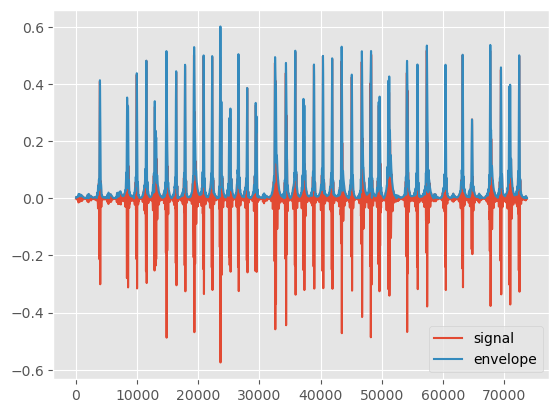

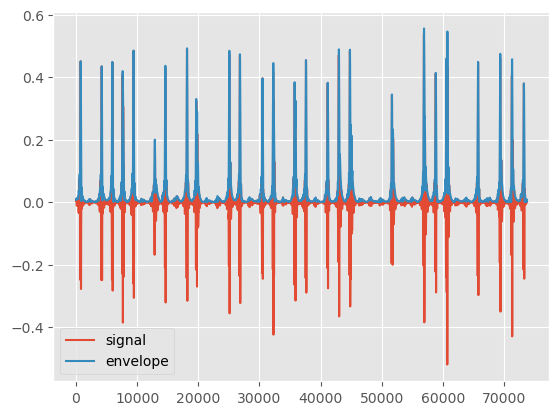

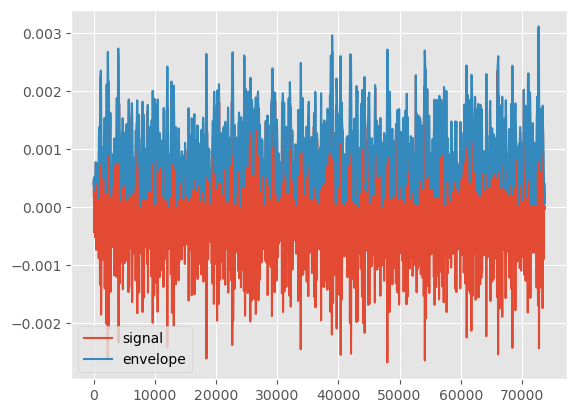

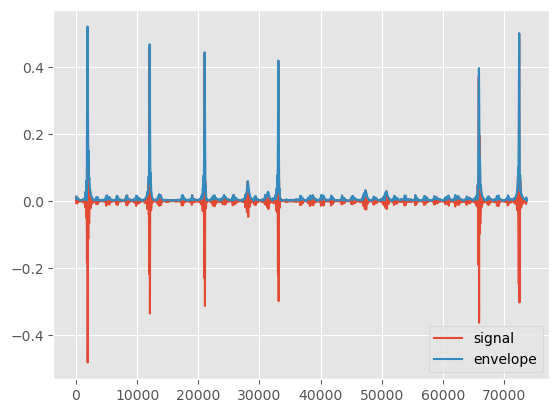

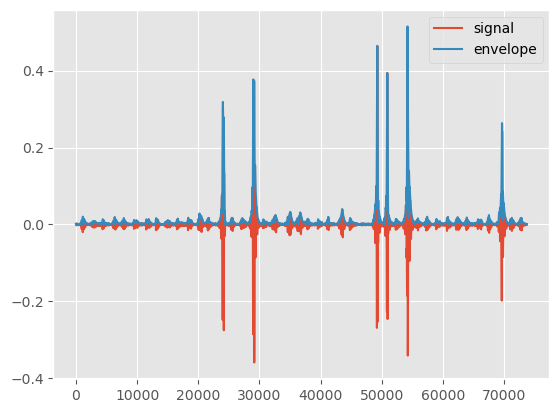

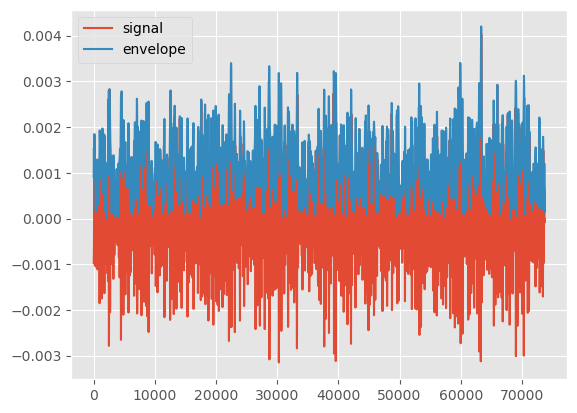

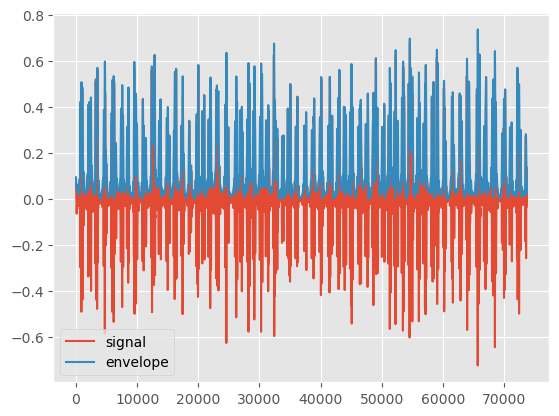

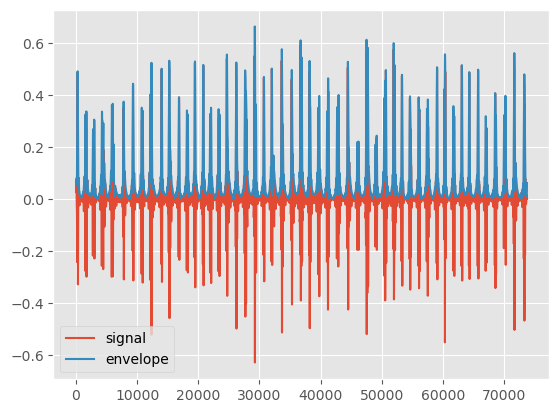

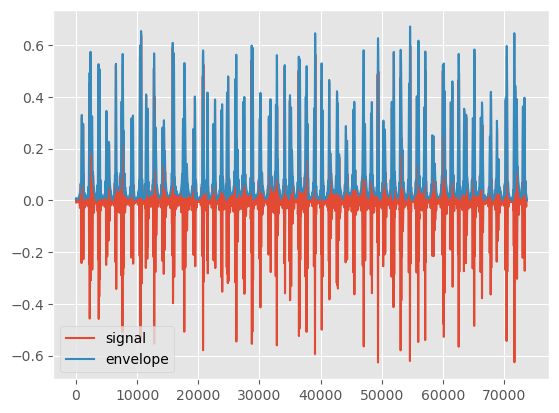

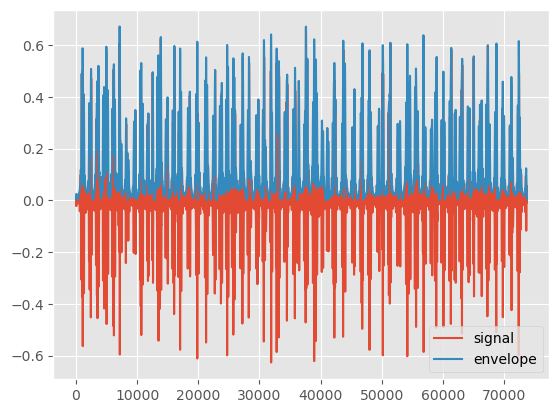

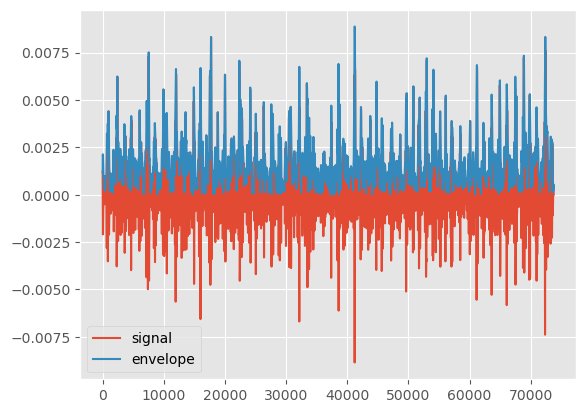

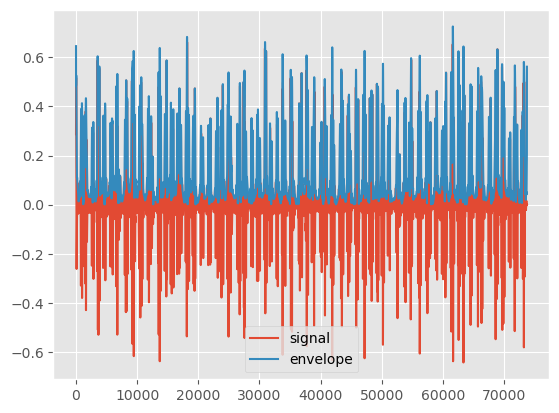

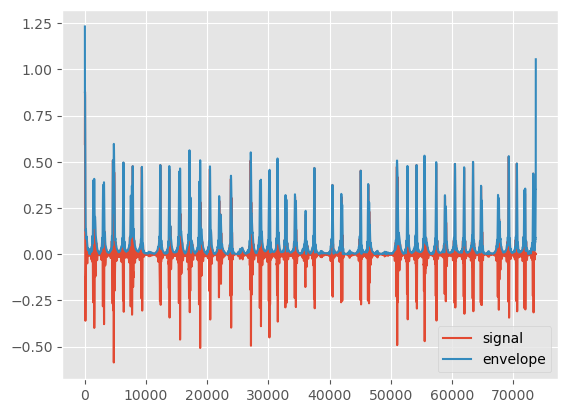

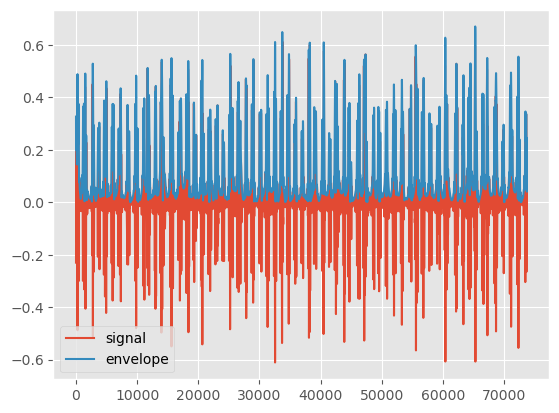

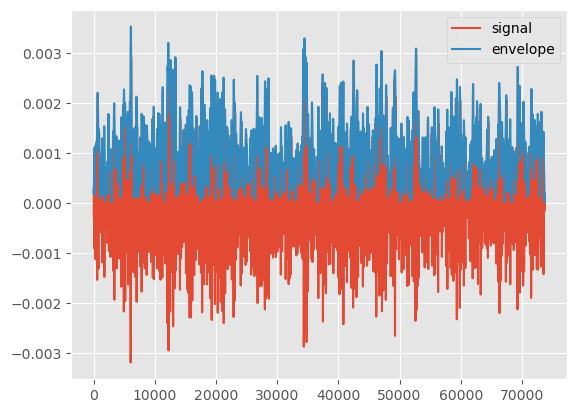

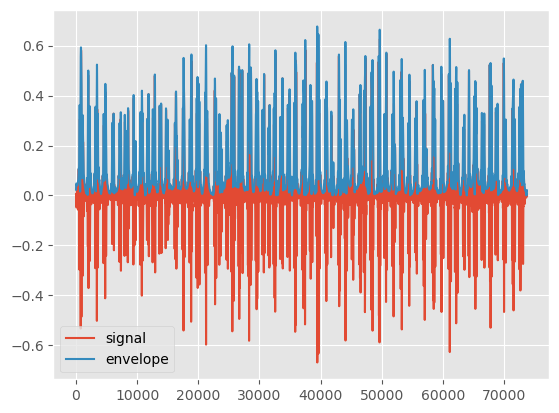

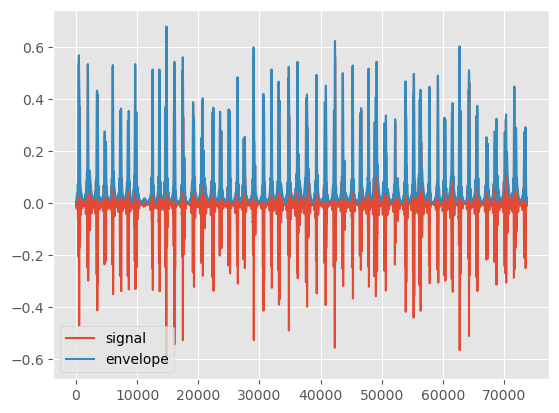

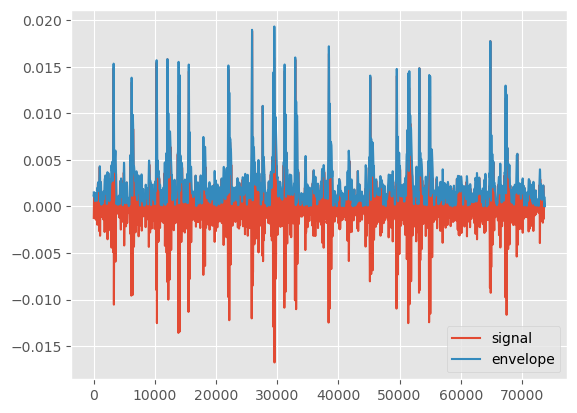

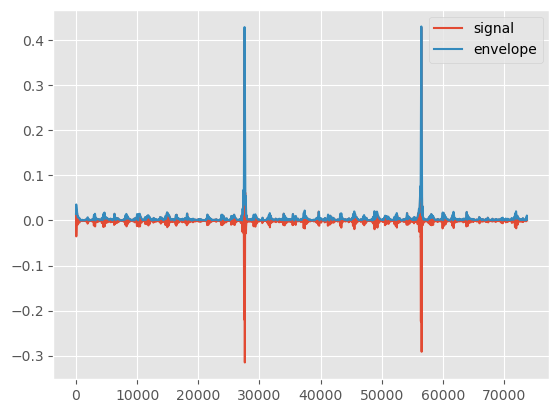

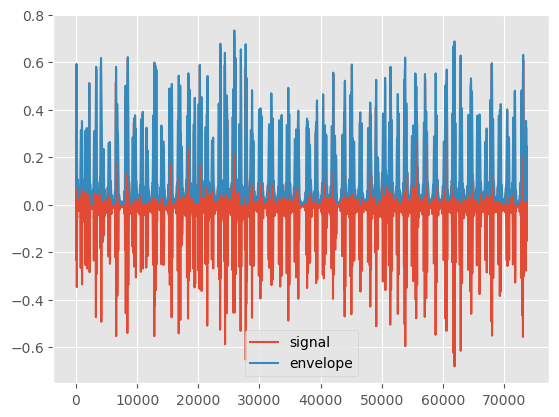

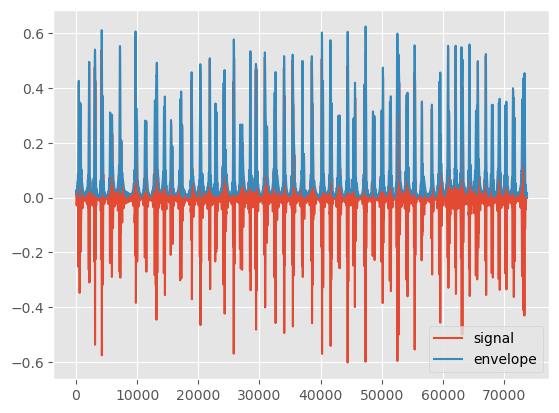

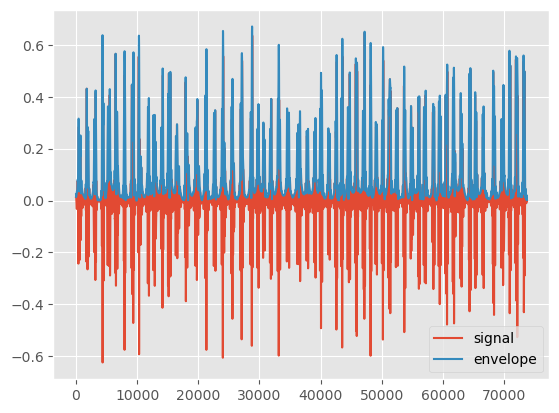

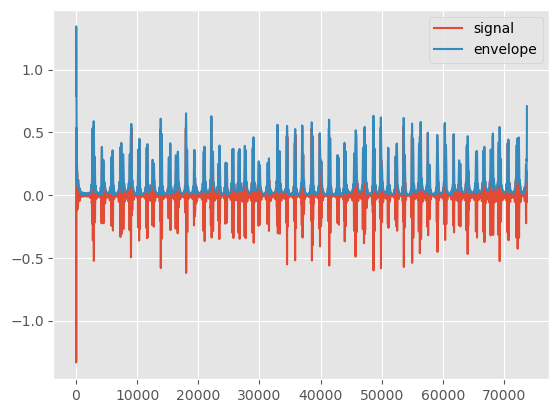

KeyboardInterrupt: 

In [21]:
prefix_path = '/Users/yilewang/LFP6vars'
# import participant info
df_info = pd.read_excel('/Users/yilewang/workspaces/data4project/mega_table.xlsx', sheet_name='tvb_parameters')
# import raw data
for x,y,z in zip(df_info['group'], df_info['caseid'], df_info['Gc']):
    single_subj = np.load(f"{prefix_path}/{x}/{y}_{z}.npy")
    # downsample the signal
    single_subj_left_pcg = decimate(single_subj[81920:,0,4,0], 10)
    # bandpass filter the signal
    single_subj_filtered = butter_bandpass_filter(single_subj_left_pcg, 30, 100, 8192, order=5)
    # hilbert transform
    analytic_signal = hilbert(single_subj_filtered)
    amplitude_envelop = np.abs(analytic_signal)
    instantaneous_phase = np.angle(analytic_signal)
    # plt.plot(single_subj_filtered)
    # Plot original signal and amplitude envelope
    fig, ax = plt.subplots()
    ax.plot(single_subj_filtered, label='signal')
    ax.plot(amplitude_envelop, label='envelope')
    #ax.plot(instantaneous_phase, label='phase')
    ax.legend()
    plt.show()